In [21]:
#Titanic Machine Learning challenge
#Data exploration / Data surfing
# Ponder questions, Explore potential data
#https://www.kaggle.com/c/titanic/data

import pandas as pd
import matplotlib as plt

df = pd.read_csv("D:\\Datasets\\Titanic Machine Learning from Disaster\\kaggle datasets\\train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
#Check datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Check summary statistics for the numeric variables 
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
#Check number of unique values in the catgegorical columns
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

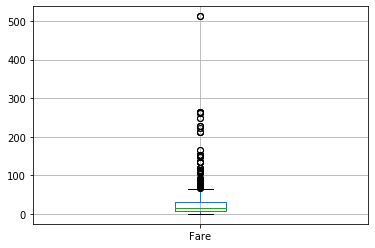

In [15]:
#Check Fare for outliers

%matplotlib inline

df.boxplot(column="Fare")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4BB9F6188>]],
      dtype=object)

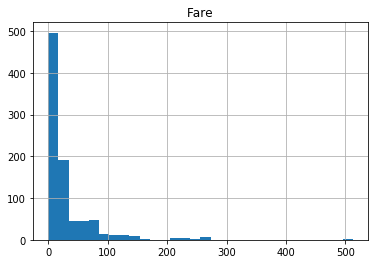

In [7]:
df.hist(column="Fare", bins = 30)

In [16]:
#correlation of Fare and survival

y = df["Survived"]
x = df["Fare"]

x.corr(y)

0.2573065223849623

In [17]:
y = df["Survived"]
x_sqr = df["Fare"]**0.5

x_sqr.corr(y)

0.3125077980148677

In [20]:
#correlation of Age and survival

x_age = df["Age"]

x_age.corr(y)

-0.07722109457217764

In [19]:
x_age = df["Age"]**0.5

x_age.corr(y)

-0.10020567110461653

In [21]:
#Create frequency tables / cross tabulations for data analysis

pd.crosstab(df["Survived"], df["Sex"], margins=True)

Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891

In [11]:
#Create frequency tables in percentage form

def percConvert(ser):
  return ser/float(ser[-1])
pd.crosstab(df["Survived"], df["Sex"],margins=True).apply(percConvert, axis=1)

Sex         female      male  All
Survived                         
0         0.147541  0.852459  1.0
1         0.681287  0.318713  1.0
All       0.352413  0.647587  1.0

In [34]:
#Did babies survive in a higher degree than others?

df.loc[df["Age"] < 2]

PassengerId  Survived  Pclass                             Name     Sex  \
78            79         1       2    Caldwell, Master. Alden Gates    male   
164          165         0       3     Panula, Master. Eino Viljami    male   
172          173         1       3     Johnson, Miss. Eleanor Ileen  female   
183          184         1       2        Becker, Master. Richard F    male   
305          306         1       1   Allison, Master. Hudson Trevor    male   
381          382         1       3      Nakid, Miss. Maria ("Mary")  female   
386          387         0       3  Goodwin, Master. Sidney Leonard    male   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
644          645         1       3           Baclini, Miss. Eugenie  female   
755          756         1       2        Hamalainen, Master. Viljo    male   
788          789         1       3       Dean, Master. Bertram Vere    male   
803          804         1       3  Thomas, Master. Assad Alexander    male   
827          828         1       2            Mallet, Master. Andre    male   
831          832         1       2  Richards, Master. George Sibley    male   

      Age  SibSp  Parch           Ticket      Fare    Cabin Embarked  
78   0.83      0      2           248738   29.0000      NaN        S  
164  1.00      4      1          3101295   39.6875      NaN        S  
172  1.00      1      1           347742   11.1333      NaN        S  
183  1.00      2      1           230136   39.0000       F4        S  
305  0.92      1      2           113781  151.5500  C22 C26        S  
381  1.00      0      2             2653   15.7417      NaN        C  
386  1.00      5      2          CA 2144   46.9000      NaN        S  
469  0.75      2      1             2666   19.2583      NaN        C  
644  0.75      2      1             2666   19.2583      NaN        C  
755  0.67      1      1           250649   14.5000      NaN        S  
788  1.00      1      2        C.A. 2315   20.5750      NaN        S  
803  0.42      0      1             2625    8.5167      NaN        C  
827  1.00      0      2  S.C./PARIS 2079   37.0042      NaN        C  
831  0.83      1      1            29106   18.7500      NaN        S

In [56]:
#Kids at age 7 or younger seems less probable to perish
pd.crosstab(df["Survived"].loc[df["Age"] <= 7], df["Sex"], margins=True)

Sex       female  male  All
Survived                   
0              6    10   16
1             18    16   34
All           24    26   50